In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pune_weather = pd.read_csv("datasets/pune_temp.csv")
global_weather = pd.read_csv("datasets/global_temp.csv")

In [3]:
pune_weather.head()

,year,avg_temp
0,1796,24.39
1,1797,25.17
2,1798,24.05
3,1799,24.68
4,1800,24.67


In [4]:
global_weather.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


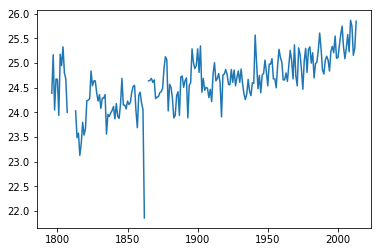

In [21]:
plt.plot(pune_weather.year, pune_weather.avg_temp)

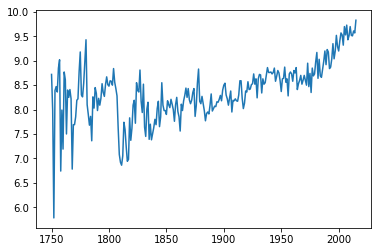

In [18]:
plt.plot(global_weather.year, global_weather.avg_temp)